In [7]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#### Loading images

In [8]:
CatDir = './train/cats'
DogDir = './train/dogs'
Images = []
Labels = []
ImgSize = 224  # VGG16 expects 224x224 images

# Load cat images (label is 0)
for filename in os.listdir(CatDir):
    ImgPath = os.path.join(CatDir, filename)
    img = load_img(ImgPath, target_size=(ImgSize, ImgSize))
    ImgArr = img_to_array(img)
    Images.append(ImgArr)
    Labels.append(0)

# Load dog images (label is 1)
for filename in os.listdir(DogDir):
    ImgPath = os.path.join(DogDir, filename)
    img = load_img(ImgPath, target_size=(ImgSize, ImgSize))
    ImgArr = img_to_array(img)
    Images.append(ImgArr)
    Labels.append(1)

#### Pre-processing (improved by using CNN i.e. VGG16)

In [9]:
Images = np.array(Images)
Labels = np.array(Labels)
Images = preprocess_input(Images)

# Loading the pre-trained VGG16 model + higher level layers
BaseModel = VGG16(weights='imagenet')
model = Model(inputs=BaseModel.input, outputs=BaseModel.get_layer('fc1').output)

# Extracting Features
Features = model.predict(Images)
XTrain, XTest, YTrain, YTest = train_test_split(Features, Labels, test_size=0.2, random_state=42)
scaler = StandardScaler()
XTrain = scaler.fit_transform(XTrain)
XTest = scaler.transform(XTest)

22/22 [==============================] - 45s 2s/step


#### SVM Model

In [10]:
SVM = SVC(kernel='linear', random_state=42)
SVM.fit(XTrain, YTrain)
YPred = SVM.predict(XTest)

#### Evaluating the model

In [11]:
Acc = accuracy_score(YTest, YPred)
print(f'Accuracy: {Acc:.4f}')
print('Classification Report:')
print(classification_report(YTest, YPred))

Accuracy: 0.9429
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        78
           1       0.97      0.90      0.93        62

    accuracy                           0.94       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140



#### Visualizing Confusion Matrix

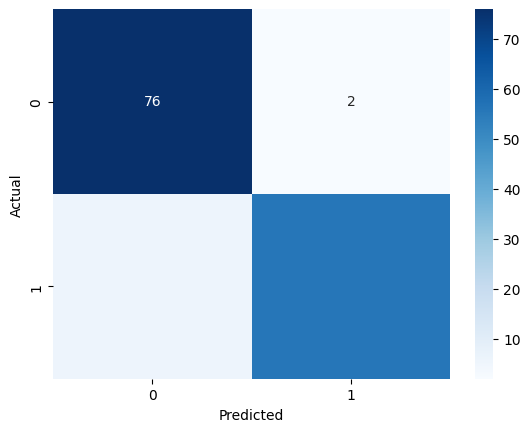

In [12]:
ConfusionMat = confusion_matrix(YTest, YPred)
sns.heatmap(ConfusionMat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()